<a href="https://colab.research.google.com/github/zi2p/M-machine-learning/blob/main/M33001_%D0%9F%D0%B8%D1%81%D0%B0%D1%80%D0%B5%D0%B2%D0%B0_lab7.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

1)


In [ ]:
a = torch.FloatTensor(3, 4)
b = torch.FloatTensor(12)

2)

In [ ]:
c = b.view(2, 2, 3)

3)

In [ ]:
[row[0].item() for row in a]

[2.702035395838266e-34, nan, 4.306622594243449e+21]

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

1)

In [ ]:
a = torch.FloatTensor(5, 2)
b = torch.FloatTensor(1, 10)

2)

In [ ]:
c = b.view(5, 2)

3)

In [ ]:
a_plus_c = a + c
a_minus_c = a - c
a_ymnojit_c = a * c   # умножение поэлементное 
a_delit_c = a / c      # деление поэлементное
a_add_c = a.add(c)
a_sub_c = a.sub(c)
a_mul_c = a.mul(c)
a_div_c = a.div(c)

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

1)

In [ ]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

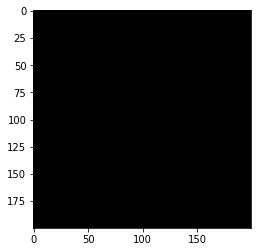

In [ ]:
plt.imshow(images[3])

2)


In [ ]:
for i in range(images.shape[0]):
  images[i][i * 2] = images[i][i * 2 + 1] = 255

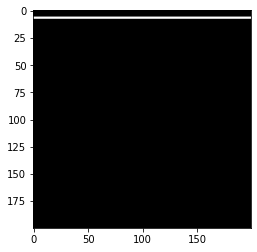

In [ ]:
plt.imshow(images[3])

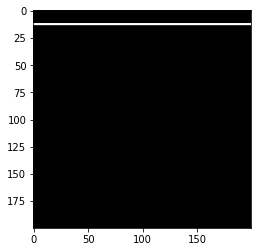

In [ ]:
plt.imshow(images[6])

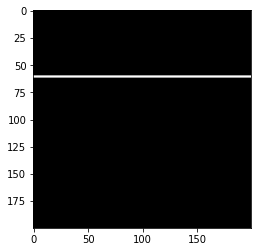

In [ ]:
plt.imshow(images[30])

3)

In [ ]:
values = (images.float()[1].mean() * 70).item()
new_images = images.clone()
new_images[0] = values

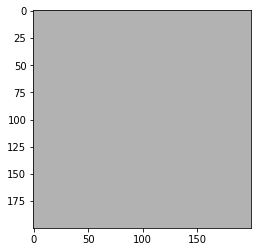

In [ ]:
gray_image_0 = new_images[0]
plt.imshow(gray_image_0)

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

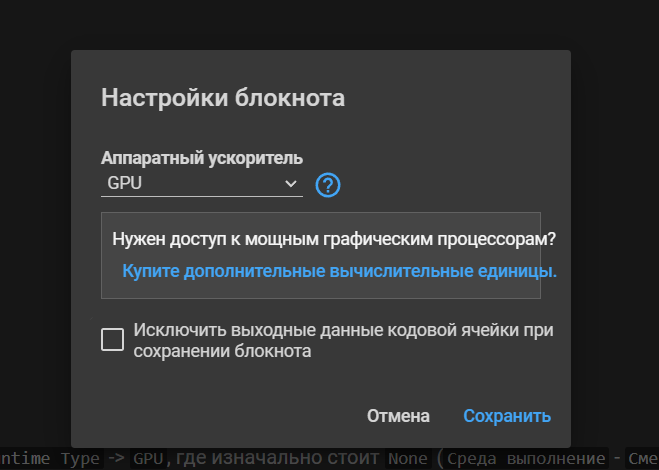

In [ ]:
from torch.autograd import Variable

In [ ]:
a = torch.FloatTensor(2, 3, 4).cuda().uniform_()
b = torch.FloatTensor(1, 8, 3).cuda().uniform_()

In [ ]:
c = b.view(2, 3, 4)

In [ ]:
a = Variable(a.cpu())
c = Variable(c.cpu(), requires_grad=True)

In [ ]:
L = torch.mean((c - a) ** 2)
L.backward()
c_grad = c.grad

In [ ]:
print(c_grad)

tensor([[[ 0.0035,  0.0004, -0.0631, -0.0062],
         [-0.0108,  0.0119,  0.0444,  0.0125],
         [ 0.0019, -0.0062,  0.0061, -0.0395]],

        [[ 0.0491,  0.0461, -0.0184,  0.0660],
         [ 0.0024, -0.0105, -0.0345,  0.0066],
         [ 0.0442, -0.0272,  0.0472, -0.0555]]])
